Access GPU

In [ ]:
!nvidia-smi

Sun Jun  4 23:26:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

helper var for path management

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


installing yolo v8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

using CLI

In [ ]:
%cd {HOME}

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4qwCRr5PnrJwai3QaIpB")
project = rf.workspace("comvis-plat-nomor").project("plat-nomor-pada-kendaraan")
dataset = project.version(1).download("yolov8")


/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=3d6bc57aba8f2c140aeacbf279a966ba397dd85d2052b764f97e958d89b8fc23
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.113, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Plat-Nomor-Pada-Kendaraan-1 in yolov8:: 100%|██████████| 5482/5482 [00:01<00:00, 3020.75it/s]


Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect model=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100, batch =8, imgsz=100

/content
WARNING ⚠️ 'epochs=100,' does not require trailing comma ',', updating to 'epochs=100'.
WARNING ⚠️ 'batch=8,' does not require trailing comma ',', updating to 'batch=8'.
WARNING ⚠️ 'mode' is missing. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark'). Using default 'mode=train'.
100% 21.5M/21.5M [00:00<00:00, 166MB/s]
Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Plat-Nomor-Pada-Kendaraan-1/data.yaml, epochs=100, patience=50, batch=8, imgsz=100, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, 

/content


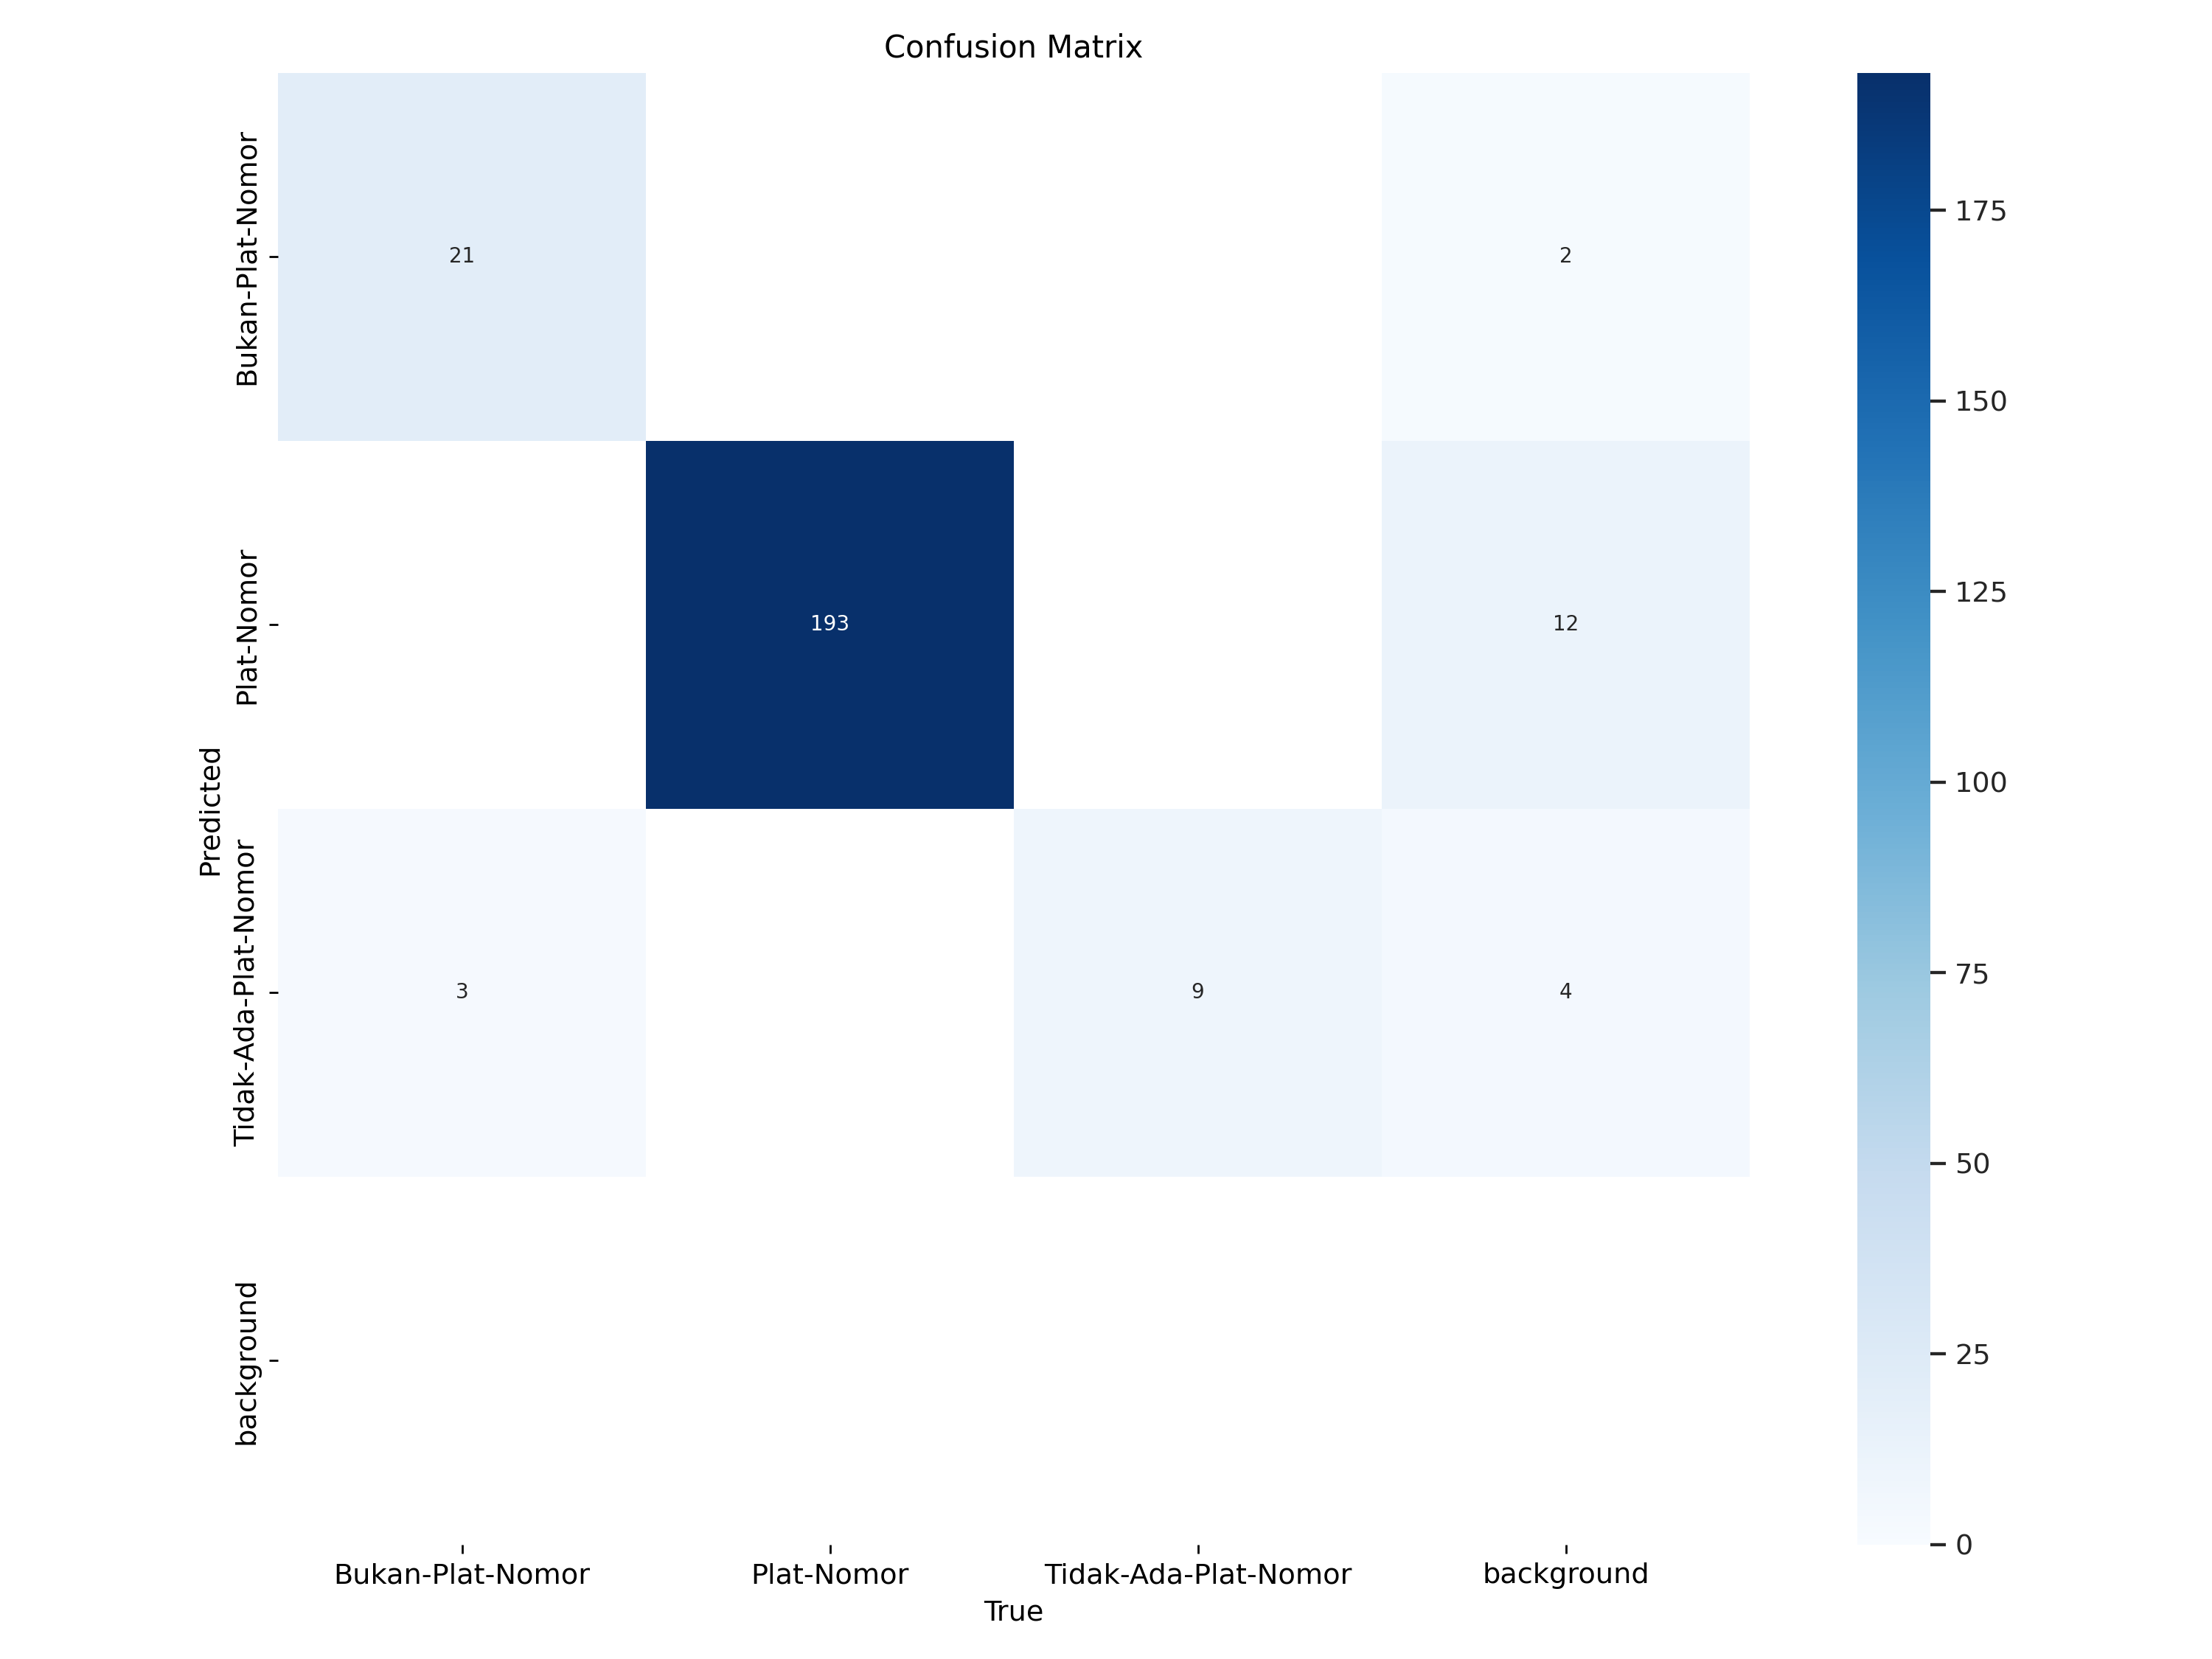

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


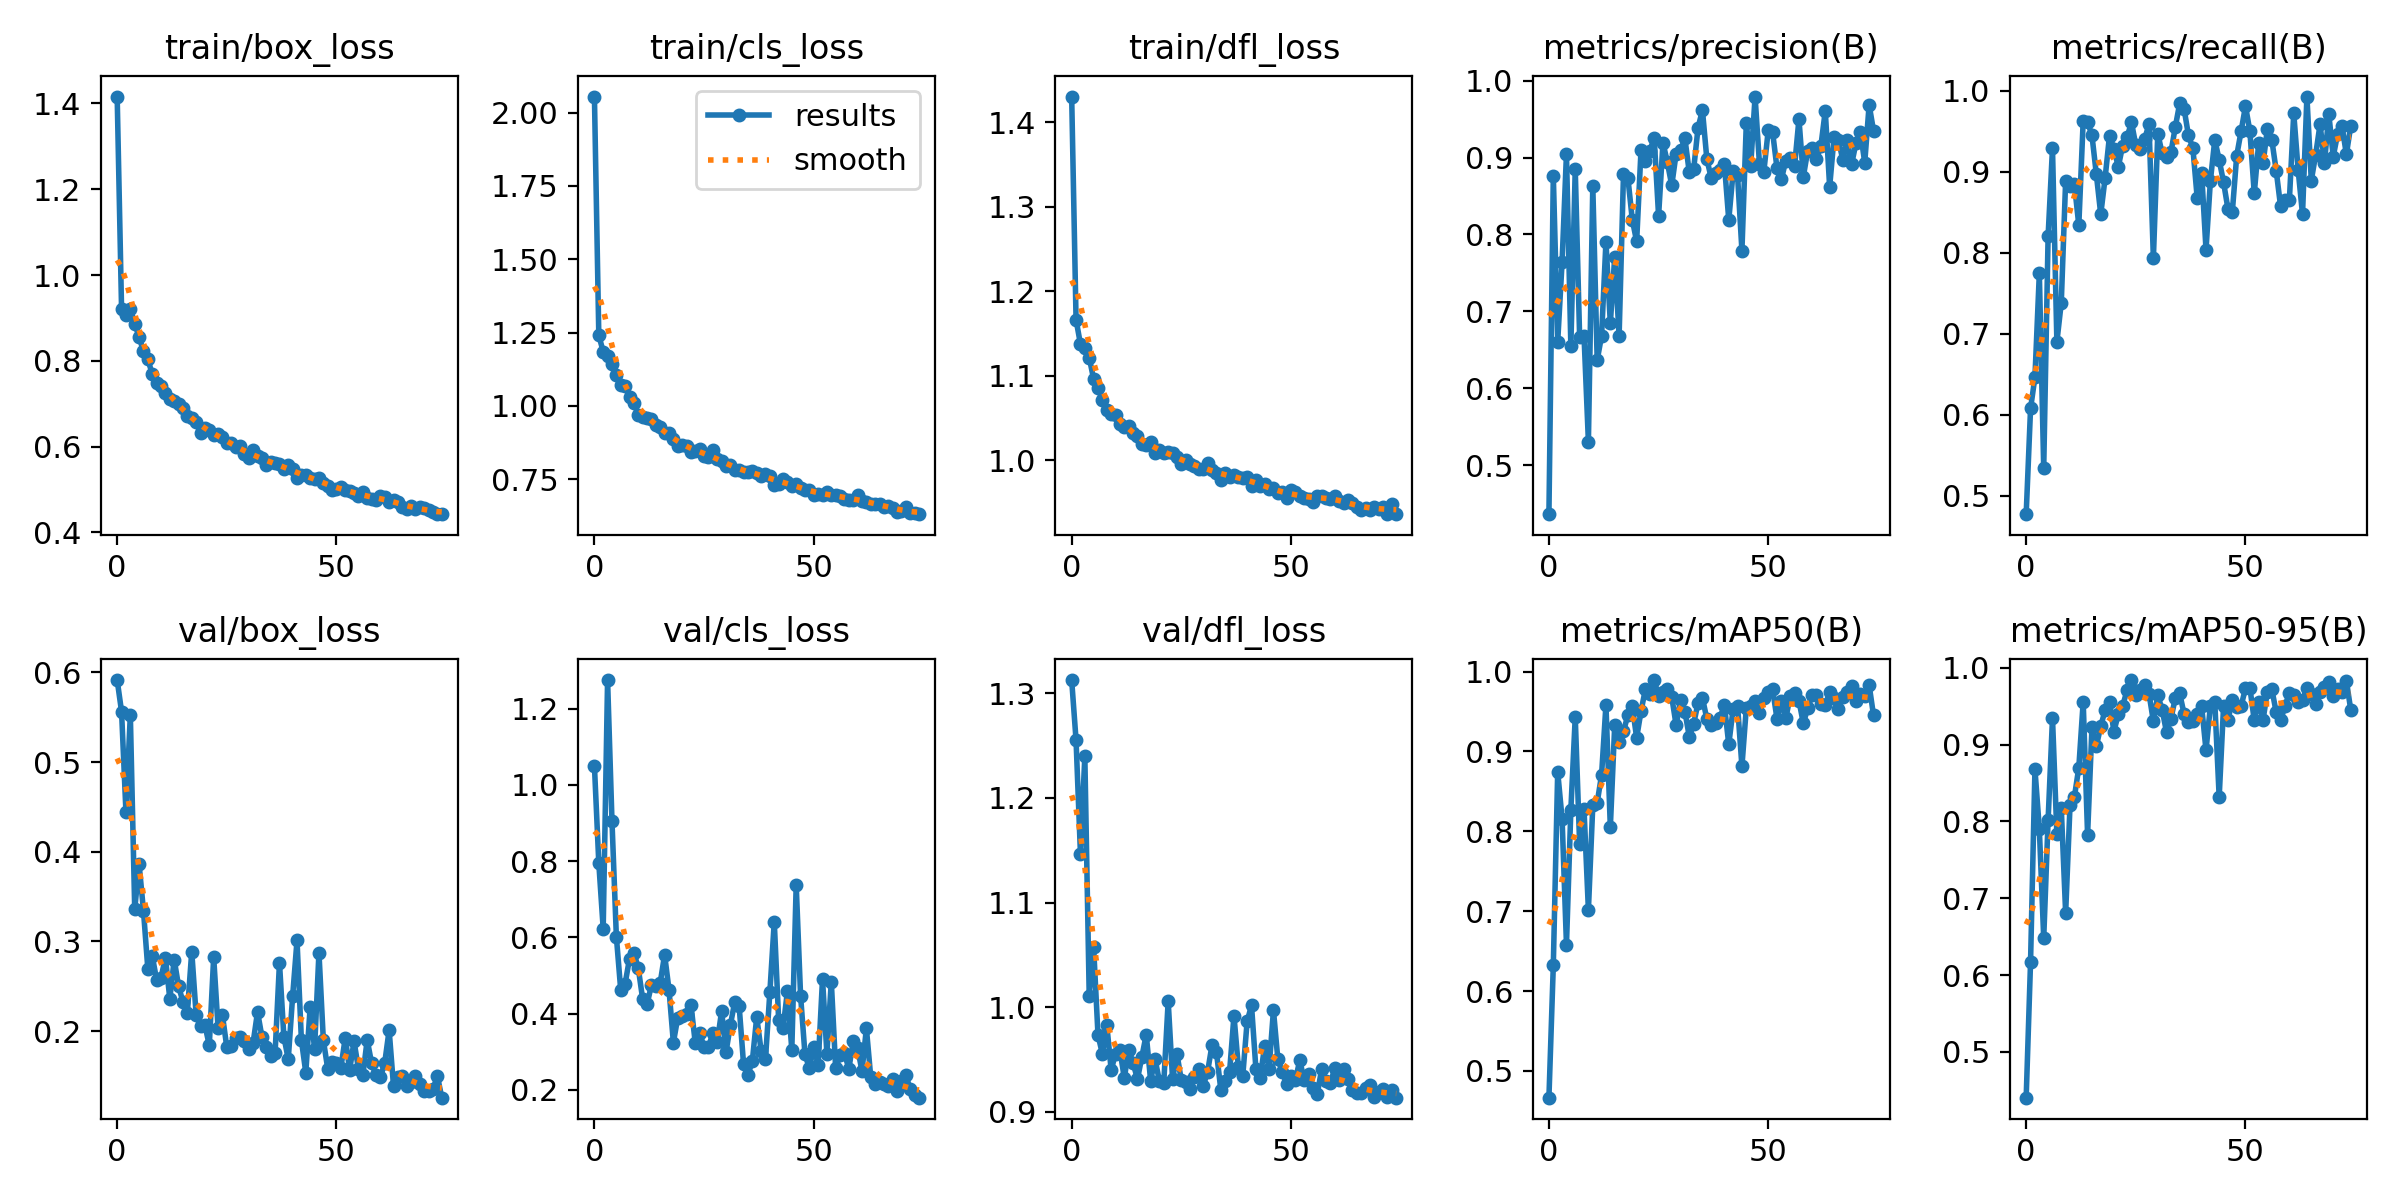

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


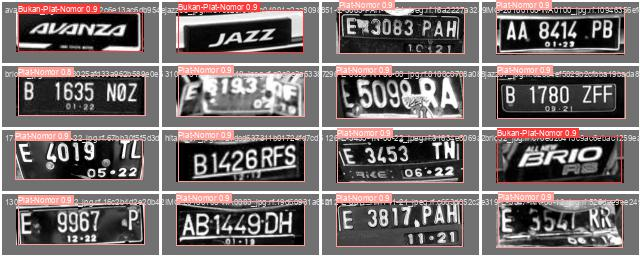

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


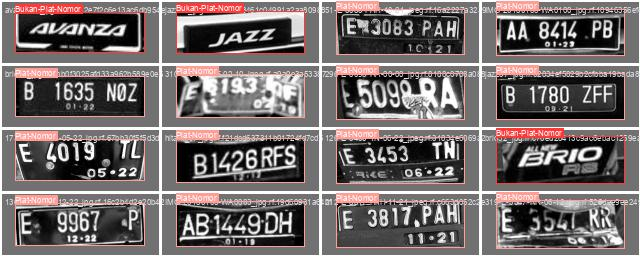

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients
val: Scanning /content/Plat-Nomor-Pada-Kendaraan-1/valid/labels.cache... 226 images, 0 backgrounds, 0 corrupt: 100% 226/226 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 226. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:04<00:00,  3.36it/s]
                   all        226        226      0.926      0.961      0.989      0.984
      Bukan-Plat-Nomor        226         24          1      0.883      0.989      0.978
            Plat-Nomor        226        193          1          1      0.995      0.991
  Tidak-Ada-Plat-Nomor        2